<a href="https://colab.research.google.com/github/Ahmedaboenaba/Machine-Learning/blob/main/Neural%20Networks/mnist_classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mnist Classification by ANN

### Objective: ANN model to classify the MNIST digits. En route, I will show various steps to build the ANN model to classify the MNIST digits with Keras library. I will show how to compile, train and evaluate the model.

1. MNIST dataset
2. Data Exploring
3. Data normalization in Keras
4. Densely connected networks in Keras

    4.1 Sequential Class in Keras
    4.2 Defining the model

5. Model Summary

    5.1 Parameters of the model

6. Implementation of Neural Network in Keras

    6.1 Compilation of model
    6.2 Training the model
    6.3 Evaluation of model

7. Accuracy of the model
8. Confusion-matrix
9. Generate predictions
10. ANN- The Complete Example
Conclusion
References

- MNIST is a collection of handwritten digits ranging from the number 0 to 9.

- It has a training set of 60,000 images and 10,000 test images that are classified into corresponding categories or labels.

- In Keras the MNIST dataset is preloaded in the form of four Numpy arrays.

- To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically.

- The following Keras code shows how to access MNIST dataset, plot 25 random samples, and count the number of labels for train and test datasets:

### Necessary Libraries

In [22]:
# Data Manipultion
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#ANN
import keras

#load mnist
from keras.datasets import mnist

#keras libraries
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.utils import to_categorical

#Evaluation
from sklearn.metrics import confusion_matrix, classification_report


### Data Loading

In [2]:
# Split dataset into training and testing
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


the image is for number:5


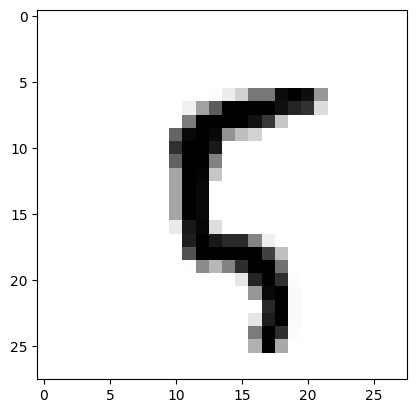

In [ ]:
# Display random image
plt.imshow(x_train[100],cmap=plt.cm.binary)
print(f"the image is for number:{y_train[100]}")

### Exploring

In [ ]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape
#Training images: 60000 image with dimension 28*28 (2D)
#Testing images: 10000 image with dimension 28*28 (2D)

#Training labels: 60000 label
#Testing labels: 10000 label

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
x_train.ndim, x_test.ndim, y_train.ndim, y_test.ndim

(3, 3, 1, 1)

In [ ]:
x_train.dtype, x_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

### Data Normalization

In [3]:
# Scale input data to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
# scale the input values within interval [0, 1]
x_train /= 255
x_test /= 255

In [5]:
# reshape images to become all in the same size by 784 (28*28)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
#after scaling the images become in 1 dimension not 2 as you see
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [6]:
# Encode y to one hot encoding
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [ ]:
# Check after encoding
y_train[100]
# we se that 5 index is true as it in reality equal to 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
y_train.shape, y_test.shape
# 10 is for classes

((60000, 10), (10000, 10))

### Model keras

In [8]:
# create empty neural network
model = Sequential()

#1st hidden layer
model.add(Dense(128, activation='relu', input_shape=(784,)))
#2nd layer
model.add(Dense(256, activation='relu'))
#3rd
model.add(Dense(256, activation='relu'))
# 4th
model.add(Dense(64,activation='relu'))
#Output layer
model.add(Dense(10, activation='softmax'))

In [9]:
# show NN structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,394 (845.29 KB)

 Trainable params: 216,394 (845.29 KB)

 Non-trainable params: 0 (0.00 B)

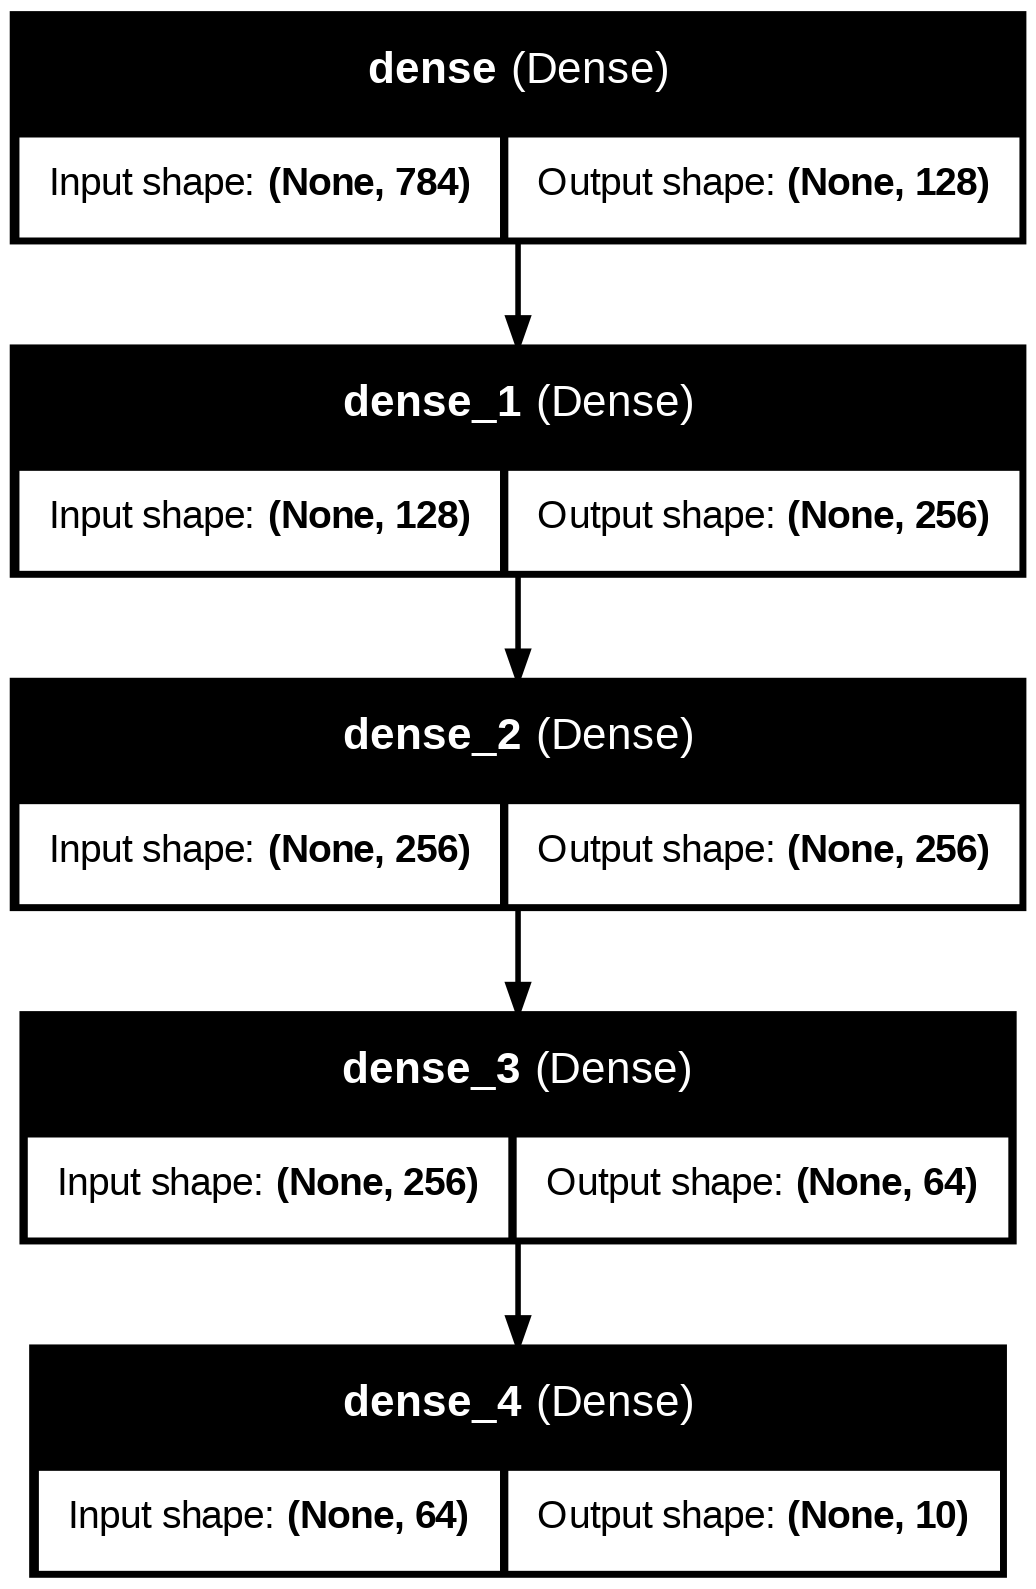

In [11]:
# visulaize the NN
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# build the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# optimizer: sgd- stochastic gradient descent
# loss (calculate error): categorical_crossentropy for multi classes

In [13]:
# train the model
history = model.fit(x_train, y_train, validation_split=0.1,batch_size=128, epochs=100)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3459 - loss: 2.0380 - val_accuracy: 0.8490 - val_loss: 0.6796
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8330 - loss: 0.6271 - val_accuracy: 0.9042 - val_loss: 0.3490
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8866 - loss: 0.3970 - val_accuracy: 0.9212 - val_loss: 0.2751
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9041 - loss: 0.3316 - val_accuracy: 0.9262 - val_loss: 0.2566
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9126 - loss: 0.2969 - val_accuracy: 0.9387 - val_loss: 0.2212
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9196 - loss: 0.2730 - val_accuracy: 0.9417 - val_loss: 0.2060
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9262 - loss: 0.2548 - val_accuracy: 0.9470 - val_loss: 0.1906
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9336 - loss: 0.2340 - val_accu

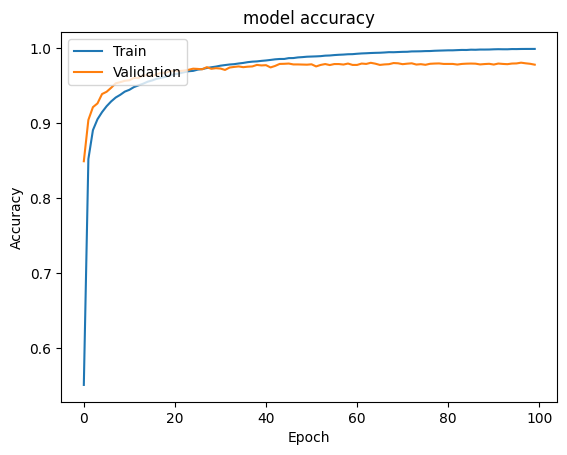

In [15]:
#Visualize the trainingand validation accuracy graph and also losses
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

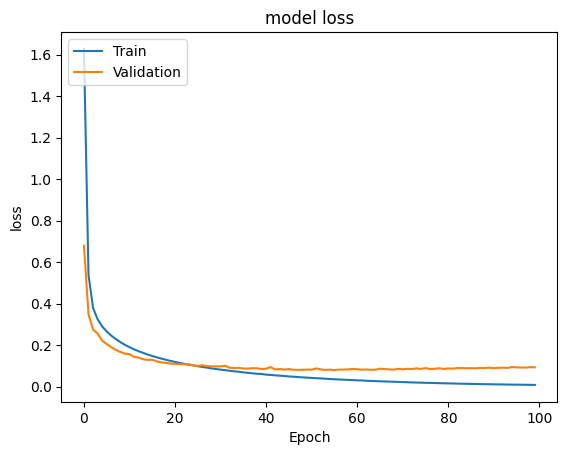

In [16]:
# losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

### Evaluation

In [18]:
#Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.1051


In [19]:
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.08997905999422073
Test accuracy: 0.9763000011444092


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


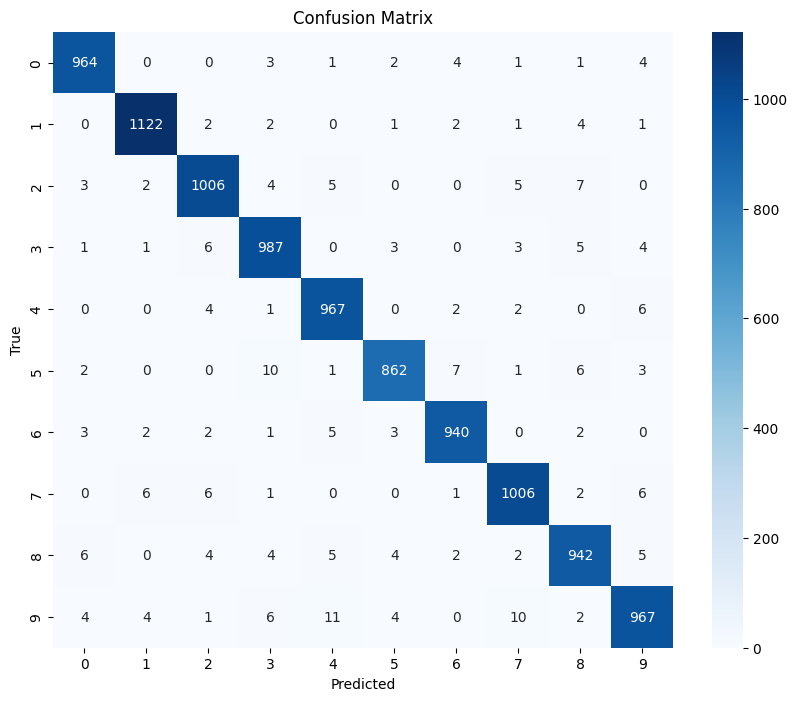

In [21]:
#Confusion Matrix
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

#visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
#Classification Report
print(classification_report(y_true, y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9807    0.9837    0.9822       980
           1     0.9868    0.9885    0.9877      1135
           2     0.9758    0.9748    0.9753      1032
           3     0.9686    0.9772    0.9729      1010
           4     0.9719    0.9847    0.9782       982
           5     0.9807    0.9664    0.9735       892
           6     0.9812    0.9812    0.9812       958
           7     0.9758    0.9786    0.9772      1028
           8     0.9701    0.9671    0.9686       974
           9     0.9709    0.9584    0.9646      1009

    accuracy                         0.9763     10000
   macro avg     0.9762    0.9761    0.9761     10000
weighted avg     0.9763    0.9763    0.9763     10000

